# LDA using Gensim

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: Depreca

In [8]:
def extract_text(data_path):
    '''
    extract text(abstract) in data
    '''
    df = pd.read_csv(data_path)
    texts = df['abstract'].to_list()
    return texts

In [9]:
def tokenizer(text):
    '''
    apply tokenizer
    '''
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

In [13]:
# load data and extract texts (abstract)
path = '../data/trust_robot.csv'
papers = extract_text(path)

In [14]:
# main
cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

# 토큰화
texts = [tokenizer(paper) for paper in papers]

<>:3: DeprecationWarning: invalid escape sequence \w
<>:3: DeprecationWarning: invalid escape sequence \w
/var/folders/f8/6p0t23zx0p9c90vcc29hyy1h0000gn/T/ipykernel_54755/247114921.py:3: DeprecationWarning: invalid escape sequence \w
  RegTok = RegexpTokenizer("[\w']{3,}")


In [23]:
# 토큰화 결과로부터 dictionary 생성
dictionary = Dictionary(texts)
print('Number of initial unique words in documents:', len(dictionary))

Number of initial unique words in documents: 14676


In [57]:
# 문서 빈도수가 너무 적거나 높은 문서를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print("Number of unique words after removing rare and common words:", len(dictionary))

Number of unique words after removing rare and common words: 2000


In [58]:
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of unique tokens: 2000
Number of documents: 1236


In [59]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []
    
    for i in range(start, end+1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                         chunksize=1000, num_topics=i,
                         random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
        
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel('num_topics')
    plt.ylabel('perplexity')
    plt.show()
    
    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel('num_topics')
    plt.ylabel('coherence')
    plt.show()
    
    return per_value, coh_value

num_topics: 1, perplexity: -7.110, coherence: -1.367
num_topics: 2, perplexity: -7.066, coherence: -1.255
num_topics: 3, perplexity: -7.094, coherence: -1.329
num_topics: 4, perplexity: -7.098, coherence: -1.434
num_topics: 5, perplexity: -7.104, coherence: -1.436
num_topics: 6, perplexity: -7.127, coherence: -1.518
num_topics: 7, perplexity: -7.132, coherence: -1.483
num_topics: 8, perplexity: -7.164, coherence: -1.570
num_topics: 9, perplexity: -7.188, coherence: -1.580
num_topics: 10, perplexity: -7.211, coherence: -1.699


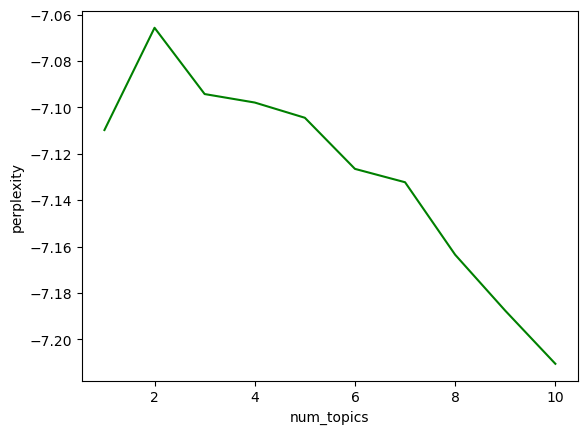

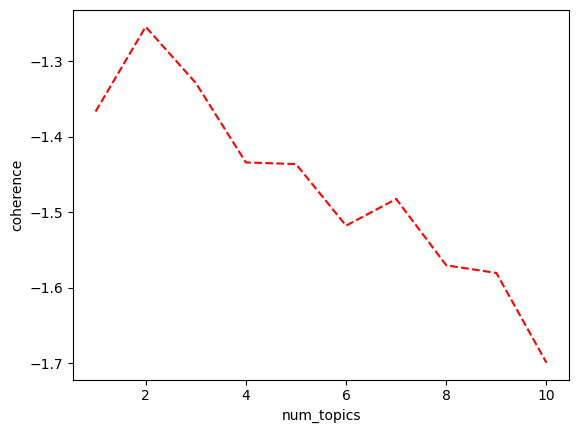

In [60]:
per_value, coh_value = show_coherence(corpus, dictionary, start=1, end=10)

In [61]:
best_p_topic = per_value.index(min(per_value))
best_c_topic = coh_value.index(max(coh_value))
print("best topic num in perplexity:", best_p_index)
print("best topic num in coherence:", best_c_index)

best topic num in perplexity: 9
best topic num in coherence: 1


In [64]:
# choose num_topics according to the perplexity
passes = 5
%time model1 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=best_p_topic, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis1 = gensimvis.prepare(model1, corpus, dictionary)
lda_vis1

CPU times: user 9.31 s, sys: 153 ms, total: 9.47 s
Wall time: 10.5 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.035606  0.002731       1        1  14.815138
6      0.047985  0.005932       2        1  12.759896
3      0.026250  0.048785       3        1  10.897747
9     -0.020994 -0.013634       4        1   8.273620
4      0.039319 -0.001058       5        1   8.209184
10    -0.051618  0.025834       6        1   6.737100
13     0.042409  0.014882       7        1   5.850662
7     -0.086299  0.069241       8        1   5.428273
14     0.004769  0.014394       9        1   5.265187
0     -0.061685 -0.005164      10        1   4.701226
8      0.060461  0.093189      11        1   4.177703
5     -0.061400 -0.045067      12        1   3.967197
2      0.152013 -0.080119      13        1   3.355576
1     -0.067867 -0.056163      14        1   2.946567
12    -0.058949 -0.073785      15        1   2.614925, topic_info=        Term        Freq       Total Category  logprob  loglift
49    system  830.000000  830.000000  Default  30.0000  30.0000
108   health  595.000000  595.000000  Default  29.0000  29.0000
129  monitor  556.000000  556.000000  Default  28.0000  28.0000
281    activ  662.000000  662.000000  Default  27.0000  27.0000
140  patient  790.000000  790.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
114   improv   11.217309  361.179643  Topic15  -5.2915   0.1720
328     base   11.870270  503.612972  Topic15  -5.2350  -0.1038
281    activ   11.763861  662.189261  Topic15  -5.2440  -0.3866
384  conduct    9.575400  205.387866  Topic15  -5.4498   0.5782
154     rate    9.823025  290.915440  Topic15  -5.4243   0.2556

[1042 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
630       1  0.178483      100
630       2  0.059494      100
630       3  0.059494      100
630       4  0.059494      100
630       5  0.019831      100
...     ...       ...      ...
1394     12  0.102210  younger
1608      1  0.078249     zone
1608      4  0.156498     zone
1608     10  0.469493     zone
1608     14  0.234746     zone

[5159 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 4, 10, 5, 11, 14, 8, 15, 1, 9, 6, 3, 2, 13])

In [8]:
# choose num_topics according to the coherence
passes = 5
%time model2 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=best_c_topic, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis2 = gensimvis.prepare(model2, corpus, dictionary)
lda_vis2

CPU times: user 4.6 s, sys: 42.9 ms, total: 4.64 s
Wall time: 5.16 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.008158  0.016445       1        1  23.328302
4      0.044718 -0.009009       2        1  21.551208
2      0.092646  0.002093       3        1  15.673781
5     -0.049670  0.018988       4        1  15.293229
0     -0.038502  0.045852       5        1  13.730228
1     -0.041034 -0.074368       6        1  10.423251, topic_info=          Term        Freq       Total Category  logprob  loglift
108     health  616.000000  616.000000  Default  30.0000  30.0000
49      system  826.000000  826.000000  Default  29.0000  29.0000
281      activ  644.000000  644.000000  Default  28.0000  28.0000
870     seizur   90.000000   90.000000  Default  27.0000  27.0000
211        ecg   98.000000   98.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
5       assess   46.416432  462.481415   Topic6  -5.2541  -0.0378
316       self   37.316517  234.718873   Topic6  -5.4724   0.4222
172  technolog   39.179410  694.959456   Topic6  -5.4237  -0.6146
161     report   35.669740  325.712554   Topic6  -5.5175   0.0494
272       test   35.684075  361.053201   Topic6  -5.5171  -0.0532

[472 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1825      2  0.138186  academia
1825      3  0.552745  academia
1825      4  0.138186  academia
59        1  0.220466    accept
59        2  0.270934    accept
...     ...       ...       ...
58        2  0.112289      work
58        3  0.184946      work
58        4  0.085868      work
58        5  0.409523      work
58        6  0.046237      work

[1549 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 6, 1, 2])

In [10]:
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=5, \
%time model3 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=10, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis = gensimvis.prepare(model, corpus, dictionary)
lda_vis

CPU times: user 7.08 s, sys: 166 ms, total: 7.24 s
Wall time: 10.7 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.052224  0.036108       1        1  16.186082
3      0.014319  0.004051       2        1  15.923354
9      0.001763  0.015504       3        1  12.604425
4     -0.048661 -0.015768       4        1  12.443294
7      0.074907 -0.011910       5        1  10.172288
2     -0.112877 -0.058154       6        1   7.946487
5      0.055212 -0.030248       7        1   7.425735
0      0.058065 -0.071778       8        1   7.206974
8     -0.028699  0.057558       9        1   6.999845
1      0.038194  0.074637      10        1   3.091517, topic_info=          Term        Freq       Total Category  logprob  loglift
281      activ  637.000000  637.000000  Default  30.0000  30.0000
49      system  840.000000  840.000000  Default  29.0000  29.0000
108     health  605.000000  605.000000  Default  28.0000  28.0000
172  technolog  700.000000  700.000000  Default  27.0000  27.0000
453      train  225.000000  225.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
328       base   15.754317  503.559656  Topic10  -5.1193   0.0119
246   particip   15.648720  651.311086  Topic10  -5.1260  -0.2521
172  technolog   15.427957  700.537138  Topic10  -5.1402  -0.3392
455        two   11.896721  193.570023  Topic10  -5.4002   0.6871
59      accept   11.920879  373.102147  Topic10  -5.3981   0.0329

[721 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
630       1  0.098828   100
630       2  0.098828   100
630       3  0.098828   100
630       4  0.019766   100
630       5  0.039531   100
...     ...       ...   ...
462       6  0.064617  year
462       7  0.082240  year
462       8  0.058743  year
462       9  0.099863  year
462      10  0.029371  year

[2999 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 10, 5, 8, 3, 6, 1, 9, 2])

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.106468  0.015741       1        1  29.523918
0      0.118157  0.009305       2        1  25.552601
1     -0.040903 -0.067963       3        1  16.182946
3     -0.022511  0.059585       4        1  15.512814
2      0.051726 -0.016667       5        1  13.227721, topic_info=         Term         Freq        Total Category  logprob  loglift
337   surgery  1429.000000  1429.000000  Default  30.0000  30.0000
182   robotic  1494.000000  1494.000000  Default  29.0000  29.0000
384  patients  1652.000000  1652.000000  Default  28.0000  28.0000
52      trust   571.000000   571.000000  Default  27.0000  27.0000
21      human   574.000000   574.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
62       also    56.241805   317.642328   Topic5  -5.7766   0.2916
124  analysis    61.988380   504.407374   Topic5  -5.6793  -0.0736
193  surgical    64.960456   889.953961   Topic5  -5.6324  -0.5945
337   surgery    67.891694  1429.732644   Topic5  -5.5883  -1.0245
52      trust    56.962589   571.584970   Topic5  -5.7638  -0.2832

[363 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
534       1  0.751520     001
534       2  0.044685     001
534       3  0.056872     001
534       4  0.085308     001
534       5  0.060934     001
...     ...       ...     ...
868       5  0.338291  volume
1072      1  0.051569    wall
1072      2  0.103138    wall
1072      3  0.206277    wall
1072      4  0.618830    wall

[1296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

#### print_topics()
각 토픽의 상위 비중 단어 확인  
* num_topics: 매개변수로 보고 싶은 토픽의 수
* num_words: 각 토픽의 상위 단어 수 지정  

보통 num_words만 지정한다

In [65]:
model.print_topics(num_words=10)

[(0,
  '0.017*"robot" + 0.013*"human" + 0.013*"trust" + 0.009*"training" + 0.008*"robots" + 0.006*"study" + 0.006*"participants" + 0.005*"social" + 0.005*"using" + 0.005*"based"'),
 (1,
  '0.016*"patients" + 0.013*"treatment" + 0.009*"cancer" + 0.008*"clinical" + 0.007*"prostate" + 0.007*"studies" + 0.007*"evidence" + 0.007*"disease" + 0.006*"risk" + 0.006*"study"'),
 (2,
  '0.009*"robot" + 0.008*"using" + 0.008*"robotic" + 0.007*"data" + 0.006*"based" + 0.006*"use" + 0.006*"control" + 0.006*"used" + 0.006*"system" + 0.005*"high"'),
 (3,
  '0.032*"surgery" + 0.029*"robotic" + 0.017*"surgical" + 0.007*"procedures" + 0.007*"performed" + 0.007*"laparoscopic" + 0.007*"surgeons" + 0.006*"approach" + 0.006*"outcomes" + 0.006*"patients"'),
 (4,
  '0.025*"patients" + 0.012*"surgery" + 0.012*"outcomes" + 0.012*"robotic" + 0.009*"time" + 0.009*"laparoscopic" + 0.008*"study" + 0.008*"compared" + 0.007*"complications" + 0.007*"assisted"')]

### get_document_topics()  
인수로 넘긴 문서들에 대해 토픽 분포 반환
* corpus: BOW로 변환된 카운트 벡터
* minimum_probability: 보여질 토픽의 비중에 대한 임계값. 즉, minimum_probability 이상의 토픽만 출력

In [1]:
print("topic distribution of the first document:", model.get_document_topics(corpus)[100])

NameError: name 'model' is not defined